Exercise 1

In [91]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [111]:
def  midpoint_rule(integrand, left_end, right_end, num_subint):
    h = (right_end - left_end)/num_subint
    x = []
    w = []
    f = []
    for i in range(num_subint):
        xi = (i + 0.5) * h
        x.append(xi)
        w.append(h)
        f.append(integrand(xi))
    return h, sum([f_i * w_i for f_i, w_i in zip(f, w)])

def  trapezoidal_rule(integrand, left_end, right_end, num_subint):
    h = (right_end - left_end)/num_subint
    x = []
    w = []
    f = []
    for i in range(num_subint + 1):
        xi = i * h
        x.append(xi)
        if i == 0 or i == num_subint + 1: w.append(h/2)
        else: w.append(h)
        f.append(integrand(xi))
    return h, sum([f_i * w_i for f_i, w_i in zip(f, w)])


def Simpsons_rule(integrand, left_end, right_end, num_subint):
    h = (right_end - left_end)/num_subint
    x = []
    w = []
    f = []
    for i in range(2 * num_subint - 2):
        xi = i * h
        x.append(xi)
        if i == 0 or i == (2*num_subint-2): w.append(h/6)
        elif i % 2 == 0: w.append(2*h/6)
        else: w.append(4*h/6)
        f.append(integrand(xi))
    return h, sum([f_i * w_i for f_i, w_i in zip(f, w)])

In [67]:

h, comp = midpoint_rule(math.sin, 0, math.pi/2, 100)
print(comp)
h, trap = trapezoidal_rule(math.sin, 0, math.pi/2, 100)
print(trap)
h, Sim = Simpsons_rule(math.sin, 0, math.pi/2, 100)
print(Sim)

1.0000102809119051
1.0078334198735823
0.9996710473460491


<function midpoint_rule at 0x00000217F9953430>
[2.080820905649401, 2.01964579588489, 2.004877865051448, 2.001217387840837, 2.000304217378344, 2.000076046240955, 2.000019011102546, 2.0000047523457476, 2.000001188675972, 2.0000003054904956, 2.000000111087469, 2.0000000914838045, 1.9999991635768612, 1.9999918448998117, 1.9999539977341825]
<function trapezoidal_rule at 0x00000217F9953040>
[0.744226276359906, 0.8932422230797605, 0.9501165876903148, 0.9757718970468693, 0.9880468879603295, 0.9940616277930984, 0.9970401109249569, 0.998522349047689, 0.9992617441131555, 0.9996310139804284, 0.9998155424113442, 0.9999077800583376, 0.9999538921949644, 0.9999769467135494, 0.9999884735099502]
<function Simpsons_rule at 0x00000217F99531F0>
[0.6671265300079886, 1.709105740505091, 1.929184100906726, 1.9824080459788842, 1.9956089100790138, 1.998902657111001, 1.9997256910995769, 1.999931424469718, 1.9999828562025637, 1.9999957139707978, 1.9999989294550904, 1.9999997255485573, 2.0000000743305937, 2.0000005

Text(0, 0.5, 'errors')

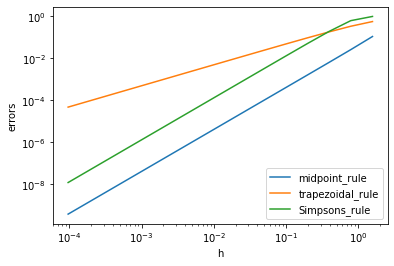

In [134]:
functions = [midpoint_rule, trapezoidal_rule, Simpsons_rule]
#plt.figure()
for f in functions:
    err_comp = []
    h_comp = []
    r_comp = []
    for i in range(15):
        h1, comp1 = f(math.sin, 0, math.pi/2, pow(2,i))
        h2, comp2 = f(math.sin, 0, math.pi/2, (pow(2,i)*2))
        r1 = math.log2((1 - comp1) / (1 - comp2))
        r_comp.append(r1)
        h_comp.append(h1)
        err_comp.append(abs(1-comp1))

    print(str(f))
    print(r_comp)
    plt.loglog(h_comp, err_comp) #label does not work :(
    #blue line: midpoint, orange line: tapezoidal, green line: Simpsons rule
 #???
plt.legend(['midpoint_rule', 'trapezoidal_rule', 'Simpsons_rule'], loc=4)
plt.xlabel('h')
plt.ylabel('errors')
#ezt ctrl c ctrl v-zni kéne a másik kettő cucchoz is

In case of midpoint rule and Simpsons rule, r converges to 2
In case of trapezoidal rule, r converges to 1

In [63]:
def  bad_trapezoidal_rule(integrand, left_end, right_end, num_subint):
    h = (right_end - left_end)/num_subint
    x = []
    w = []
    f = []
    for i in range(num_subint + 1):
        xi = i * h
        x.append(xi)
        w.append(h)
        f.append(integrand(xi))
    return h, sum([f_i * w_i for f_i, w_i in zip(f, w)])

In [64]:
err_trap = []
h_trap = []
r_trap = []
for i in range(10):
    h1, trap1 = bad_trapezoidal_rule(math.sin, 0, math.pi/2, pow(2,i))
    h2, trap2 = bad_trapezoidal_rule(math.sin, 0, math.pi/2, (pow(2,i)*2))
    r1 = math.log2((1 - trap1) / (1 - trap2))
    r_trap.append(r1)
    h_trap.append(h1)
    #err_comp.append(abs(1-comp1))

print(r_trap)

[0.744226276359906, 0.8932422230797605, 0.9501165876903148, 0.9757718970468693, 0.9880468879603295, 0.9940616277930984, 0.9970401109249569, 0.998522349047689, 0.9992617441131555, 0.9996310139804284]


It also converges to 1

Exercise 2:

In [94]:
def Euler_method(y0, T, N):
    h = T / N
    t = 0
    y = y0
    t_all = [t]
    y_all = [y]
    while t < T:
        y += h * (y - y**3)
        t += h
        t_all.append(t)
        y_all.append(y)
    return t_all, y_all

def backward_Euler_method(y0, T, N):
    h = T / N
    t = 0
    y = y0
    t_all = [t]
    y_all = [y]
    while t < T:
        approx_y = y + h * (y - y**3)
        y += h * (approx_y - approx_y**3)
        t += h
        t_all.append(t)
        y_all.append(y)
    return t_all, y_all

def Crank_Nicholson_method(y0, T, N):
    h = T / N
    t = 0
    y = y0
    t_all = [t]
    y_all = [y]
    while t < T:
        approx_y = y + h * (y - y**3)
        y += 0.5* h * (y - y**3) + 0.5* h * (approx_y - approx_y**3)
        t += h
        t_all.append(t)
        y_all.append(y)
    return t_all, y_all

def solution(y0, T, N):
    t = np.linspace(0, T, N)
    y = y0 / np.sqrt(y0**2 - (y0**2 - 1) * np.exp(-2*t))
    return t, y

Text(0, 0.5, 'y')

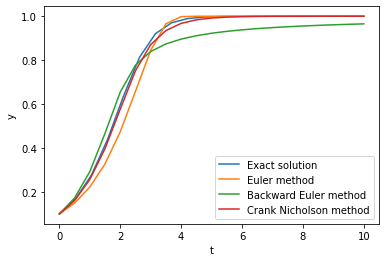

In [125]:
y0 = 0.1
T = 10
N = 20

plt.figure()
t, y = solution(y0, T, N)
plt.plot(t,y, label = 'Exact solution')
t, y = Euler_method(y0, T, N)
plt.plot(t,y, label = 'Euler method')
t, y = backward_Euler_method(y0, T, N)
plt.plot(t,y, label = 'Backward Euler method')
t, y = Crank_Nicholson_method(y0, T, N)
plt.plot(t,y, label = 'Crank Nicholson method')
plt.legend( loc=0)
plt.xlabel('t')
plt.ylabel('y')